In [1]:
# Write your imports here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import re

# Data Tidying and Cleaning Lab
## Reading, tidying and cleaning data. Preparing data for exploration, mining, analysis and learning

In this lab, you'll be working with the Coffee Quality Index dataset, located [here](https://www.kaggle.com/datasets/volpatto/coffee-quality-database-from-cqi). For convenience (and to save trouble in case you can't download files, or someone uploads a newer version), I've provided the dataset in the `data/` folder. The metadata (description) is at the Kaggle link. For this lab, you'll only need `merged_data_cleaned.csv`, as it is the concatenation of the other two datasets.

In this (and the following labs), you'll get several questions and problems. Do your analysis, describe it, use any tools and plots you wish, and answer. You can create any amount of cells you'd like.

Sometimes, the answers will not be unique, and they will depend on how you decide to approach and solve the problem. This is usual - we're doing science after all!

It's a good idea to save your clean dataset after all the work you've done to it.

### Problem 1. Read the dataset (1 point)
This should be self-explanatory. The first column is the index.

In [2]:
coffee_data = pd.read_csv("data/merged_data_cleaned.csv", index_col=0)
coffee_data

,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,Robusta,luis robles,Ecuador,robustasa,Lavado 1,our own lab,NaN,robustasa,NaN,"san juan, playas",...,Blue-Green,1,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1335,Robusta,luis robles,Ecuador,robustasa,Lavado 3,own laboratory,NaN,robustasa,40,"san juan, playas",...,Blue-Green,0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1336,Robusta,james moore,United States,fazenda cazengo,NaN,cafe cazengo,NaN,global opportunity fund,795 meters,"kwanza norte province, angola",...,NaN,6,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0
1337,Robusta,cafe politico,India,NaN,NaN,NaN,14-1118-2014-0087,cafe politico,NaN,NaN,...,Green,1,"August 25th, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN


### Problem 2. Observations and features (1 point)
How many observations are there? How many features? Which features are numerical, and which are categorical?

**Note:** Think about the _meaning_, not the data types. The dataset hasn't been thoroughly cleaned.

First, lets look at the datasets shape to see how many observations there are:

In [3]:
coffee_data.shape

(1339, 43)

We see, that there are 43 observations in the dataset. We would have to potentially clean them up soon.
We can use the dtypes method to see what the colums and their data types are.

In [4]:
coffee_data.dtypes

Species                   object
Owner                     object
Country.of.Origin         object
Farm.Name                 object
Lot.Number                object
Mill                      object
ICO.Number                object
Company                   object
Altitude                  object
Region                    object
Producer                  object
Number.of.Bags             int64
Bag.Weight                object
In.Country.Partner        object
Harvest.Year              object
Grading.Date              object
Owner.1                   object
Variety                   object
Processing.Method         object
Aroma                    float64
Flavor                   float64
Aftertaste               float64
Acidity                  float64
Body                     float64
Balance                  float64
Uniformity               float64
Clean.Cup                float64
Sweetness                float64
Cupper.Points            float64
Total.Cup.Points         float64
Moisture  

In [5]:
coffee_data.columns

Index(['Species', 'Owner', 'Country.of.Origin', 'Farm.Name', 'Lot.Number',
       'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner', 'Harvest.Year',
       'Grading.Date', 'Owner.1', 'Variety', 'Processing.Method', 'Aroma',
       'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity',
       'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Total.Cup.Points',
       'Moisture', 'Category.One.Defects', 'Quakers', 'Color',
       'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

We can divide them by their types like this:

**Categorical:** Species, Owner, Country.of.Origin, Farm.Name, Mill, Company, Region, Producer, In.Country.Partner, Owner.1, Variety, Processing.Method, Color, Certification.Body, Certification.Address, Certification.Contact, unit_of_measurement

**Numerical:** Number.of.Bags, Bag.Weight, Harvest.Year, Grading.Date, Aroma, Flavor, Aftertaste, Acidity, Body, Balance, Uniformity, Clean.Cup, Sweetness, Cupper.Points, Total.Cup.Points, Moisture, Category.One.Defects, Quakers, Category.Two.Defects, Expiration, altitude_low_meters, altitude_high_meters, altitude_mean_meters

### Problem 3. Column manipulation (1 point)
Make the column names more Pythonic (which helps with the quality and... aesthetics). Convert column names to `snake_case`, i.e. `species`, `country_of_origin`, `ico_number`, etc. Try to not do it manually.

Lets keep the dataset where we have meda changes in a different variable

In [6]:
coffee_data_fixed_names = coffee_data.rename(columns = {str : str.lower().replace(".", "_") for str in coffee_data.columns})

Lets see if it worked:

In [7]:
coffee_data_fixed_names.columns

Index(['species', 'owner', 'country_of_origin', 'farm_name', 'lot_number',
       'mill', 'ico_number', 'company', 'altitude', 'region', 'producer',
       'number_of_bags', 'bag_weight', 'in_country_partner', 'harvest_year',
       'grading_date', 'owner_1', 'variety', 'processing_method', 'aroma',
       'flavor', 'aftertaste', 'acidity', 'body', 'balance', 'uniformity',
       'clean_cup', 'sweetness', 'cupper_points', 'total_cup_points',
       'moisture', 'category_one_defects', 'quakers', 'color',
       'category_two_defects', 'expiration', 'certification_body',
       'certification_address', 'certification_contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

It worked!

### Problem 4. Bag weight (1 point)
What's up with the bag weights? Make all necessary changes to the column values. Don't forget to document your methods and assumptions.

Lets look at only the bag weights:

In [8]:
coffee_data_fixed_names.bag_weight

0       60 kg
1       60 kg
2           1
3       60 kg
4       60 kg
        ...  
1334     2 kg
1335     2 kg
1336     1 kg
1337    5 lbs
1338    5 lbs
Name: bag_weight, Length: 1339, dtype: object

In [9]:
coffee_data_fixed_names.bag_weight.unique()

array(['60 kg', '1', '30 kg', '69 kg', '1 kg', '2 kg,lbs', '6', '3 lbs',
       '50 kg', '2 lbs', '100 lbs', '15 kg', '2 kg', '2', '70 kg',
       '19200 kg', '5 lbs', '1 kg,lbs', '6 kg', '0 lbs', '46 kg', '40 kg',
       '20 kg', '34 kg', '1 lbs', '660 kg', '18975 kg', '12000 kg',
       '35 kg', '66 kg', '80 kg', '132 lbs', '5 kg', '25 kg', '59 kg',
       '18000 kg', '150 lbs', '9000 kg', '18 kg', '10 kg', '29 kg',
       '1218 kg', '4 lbs', '0 kg', '13800 kg', '1500 kg', '24 kg',
       '80 lbs', '8 kg', '3 kg', '350 kg', '67 kg', '4 kg', '55 lbs',
       '100 kg', '130 lbs'], dtype=object)

Here we see some odd data, where we dont know if its kg or lbs. Lets drop these rows.

In [10]:
coffee_data_fixed_names.query("bag_weight == '2 kg,lbs'")



,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,region,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
16,Arabica,grounds for health admin,Indonesia,toarco jaya,NaN,NaN,NaN,NaN,1200-1800m,sulawesi,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1200.0,1800.0,1500.0


In [11]:
coffee_data_fixed_names.query("bag_weight == '1 kg,lbs'")

,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,region,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
74,Arabica,grounds for health admin,El Salvador,sierra nevada,NaN,beneficio las tres puertas,9-060-60D-L-1D,NaN,1400 m,apaneca,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1400.0,1400.0,1400.0


In [12]:
coffee_data_tidy = coffee_data_fixed_names.drop(index = [16, 74])

In [13]:
coffee_data_tidy.bag_weight.unique()

array(['60 kg', '1', '30 kg', '69 kg', '1 kg', '6', '3 lbs', '50 kg',
       '2 lbs', '100 lbs', '15 kg', '2 kg', '2', '70 kg', '19200 kg',
       '5 lbs', '6 kg', '0 lbs', '46 kg', '40 kg', '20 kg', '34 kg',
       '1 lbs', '660 kg', '18975 kg', '12000 kg', '35 kg', '66 kg',
       '80 kg', '132 lbs', '5 kg', '25 kg', '59 kg', '18000 kg',
       '150 lbs', '9000 kg', '18 kg', '10 kg', '29 kg', '1218 kg',
       '4 lbs', '0 kg', '13800 kg', '1500 kg', '24 kg', '80 lbs', '8 kg',
       '3 kg', '350 kg', '67 kg', '4 kg', '55 lbs', '100 kg', '130 lbs'],
      dtype=object)

In [14]:
coffee_data_fixed_names[["unit_of_measurement", "bag_weight"]]

,unit_of_measurement,bag_weight
0,m,60 kg
1,m,60 kg
2,m,1
3,m,60 kg
4,m,60 kg
...,...,...
1334,m,2 kg
1335,m,2 kg
1336,m,1 kg
1337,m,5 lbs


We see, that there is no dependency between the unit of measurement column and whether the bag weight is measured in kg or lbs. So lets convert everything to kg.

Lets define a function to convert elements into kg and round them:

In [15]:
def convert_kg(str):
    if " kg" in str:
        str = str.replace(" kg", "")
        return int(str)
    elif " lbs" in str:
        str = str.replace(" lbs", "")
        return int(str) * 0.453592
    else:
        return int(str)

Now lets change these values:

In [16]:
coffee_data_tidy["bag_weight"] = coffee_data_tidy["bag_weight"].apply(convert_kg)
coffee_data_tidy["bag_weight"] = coffee_data_tidy["bag_weight"].astype(int)

Now we have converted everything to kg and the column now contains ints, instead of strings

In [17]:
coffee_data_tidy["bag_weight"].unique()

array([   60,     1,    30,    69,     6,    50,     0,    45,    15,
           2,    70, 19200,    46,    40,    20,    34,   660, 18975,
       12000,    35,    66,    80,    59,     5,    25, 18000,    68,
        9000,    18,    10,    29,  1218, 13800,  1500,    24,    36,
           8,     3,   350,    67,     4,   100,    58])

### Problem 5. Dates (1 point)
This should remind you of problem 4 but it's slightly nastier. Fix the harvest years, document the process.

While you're here, fix the expiration dates, and grading dates. Unlike the other column, these should be dates (`pd.to_datetime()` is your friend).

In [18]:
coffee_data_tidy.harvest_year.unique()

array(['2014', nan, '2013', '2012', 'March 2010',
       'Sept 2009 - April 2010', '2009/2010', '2015', '2011', '2016',
       '2015/2016', '2010', 'Fall 2009', '2017', '2010-2011', '2009-2010',
       '2009 - 2010', '2013/2014', '2017 / 2018', 'mmm', 'TEST',
       'December 2009-March 2010', '2014/2015', '2011/2012',
       'January 2011', '4T/10', '2016 / 2017', '23 July 2010',
       'January Through April', '1T/2011', '4t/2010', '4T/2010',
       'August to December', 'Mayo a Julio', '47/2010', 'Abril - Julio',
       '4t/2011', 'Abril - Julio /2011', 'Spring 2011 in Colombia.',
       '3T/2011', '2016/2017', '1t/2011', '2018', '4T72010', '08/09 crop'],
      dtype=object)

We can see, that in some cases the harvest year is not a single value, but rather a period so lets create two new columns for the beginning and end of the harvest:

In [19]:
def get_first_year(text):
    if text == np.nan:
        return None
    years = re.findall(r"20[0-9][0-9]", text)
    if years:
        return str(years[0])
    return None
    
coffee_data_tidy["harvest_year_begin"] = coffee_data_tidy[~(coffee_data_tidy["harvest_year"].isna())]["harvest_year"].apply(get_first_year).astype(float)
coffee_data_tidy["harvest_year_begin"].unique()

array([2014.,   nan, 2013., 2012., 2010., 2009., 2015., 2011., 2016.,
       2017., 2018.])

In [20]:
def get_last_year(text):
    if text == np.nan:
        return None
    years = re.findall(r"20[0-9][0-9]", text)
    if years:
        try:
            return str(years[1])
        except(IndexError):
            return str(years[0])
    return None

coffee_data_tidy["harvest_year_end"] = coffee_data_tidy[~(coffee_data_tidy["harvest_year"].isna())]["harvest_year"].apply(get_last_year).astype(float)
coffee_data_tidy["harvest_year_end"].unique()

array([2014.,   nan, 2013., 2012., 2010., 2015., 2011., 2016., 2009.,
       2017., 2018.])

Now lets see what we did:

In [21]:
coffee_data_tidy[["harvest_year_begin", "harvest_year_end"]]

,harvest_year_begin,harvest_year_end
0,2014.0,2014.0
1,2014.0,2014.0
2,NaN,NaN
3,2014.0,2014.0
4,2014.0,2014.0
...,...,...
1334,2016.0,2016.0
1335,2016.0,2016.0
1336,2014.0,2014.0
1337,2013.0,2013.0


It looks correct, now lets drop the original column:

In [22]:
coffee_data_tidy = coffee_data_tidy.drop(columns=["harvest_year"])

Now lets take a look at the expiration and grading dates:

In [23]:
coffee_data_tidy["expiration"].unique()

array(['April 3rd, 2016', 'May 31st, 2011', 'March 25th, 2016',
       'September 3rd, 2014', 'September 17th, 2013',
       'September 2nd, 2011', 'March 29th, 2016', 'March 26th, 2016',
       'March 12th, 2016', 'August 31st, 2011', 'June 16th, 2011',
       'April 7th, 2017', 'March 24th, 2016', 'April 2nd, 2015',
       'July 26th, 2013', 'December 2nd, 2012', 'June 26th, 2015',
       'May 18th, 2018', 'May 18th, 2017', 'May 18th, 2011',
       'December 2nd, 2016', 'May 30th, 2015', 'April 6th, 2013',
       'January 28th, 2012', 'June 17th, 2011', 'April 12th, 2013',
       'January 4th, 2012', 'June 9th, 2016', 'January 29th, 2016',
       'October 1st, 2015', 'March 20th, 2015', 'February 6th, 2015',
       'February 12th, 2013', 'May 16th, 2017', 'June 30th, 2015',
       'July 26th, 2014', 'October 9th, 2018', 'July 3rd, 2013',
       'June 5th, 2013', 'June 23rd, 2018', 'January 22nd, 2015',
       'October 25th, 2013', 'March 18th, 2014', 'January 12th, 2014',
       'May

In [24]:
coffee_data_tidy["expiration"].info()

<class 'pandas.core.series.Series'>
Index: 1337 entries, 0 to 1338
Series name: expiration
Non-Null Count  Dtype 
--------------  ----- 
1337 non-null   object
dtypes: object(1)
memory usage: 20.9+ KB


In [25]:
coffee_data_tidy["grading_date"].info()

<class 'pandas.core.series.Series'>
Index: 1337 entries, 0 to 1338
Series name: grading_date
Non-Null Count  Dtype 
--------------  ----- 
1337 non-null   object
dtypes: object(1)
memory usage: 20.9+ KB


Lets try to convert them to datetime. First we will have to remove the "st", "nd", "rd" and the "th" from the strings:

In [26]:
unwanted_parts = ["st", "nd", "rd", "th"]

def clean_dates(date):
    for element in unwanted_parts:
        date = date.replace(element, "")
    return date

Now lets change the columns to datetime:

We have to fix one date:

In [27]:
coffee_data_tidy.loc[coffee_data_tidy["expiration"] == "Augu 31, 2011", "expiration"] = "August 31, 2011"

In [28]:
coffee_data_tidy["expiration"] = coffee_data_tidy["expiration"].apply(clean_dates)

In [29]:
coffee_data_tidy["expiration"] = pd.to_datetime(coffee_data_tidy["expiration"], format = "mixed", errors = "coerce")

Doing the same for the grading date:

In [30]:
coffee_data_tidy["grading_date"] = coffee_data_tidy["grading_date"].apply(clean_dates)

In [31]:
coffee_data_tidy["grading_date"] = pd.to_datetime(coffee_data_tidy["grading_date"], format = "mixed", errors = "coerce")

Now lets see if it was successful:

In [57]:
coffee_data_tidy[["expiration", "grading_date"]].dtypes

expiration      datetime64[ns]
grading_date    datetime64[ns]
dtype: object

### Problem 6. Countries (1 point)
How many coffees are there with unknown countries of origin? What can you do about them?

Lets see the coffees without a country of origin:

In [33]:
coffee_data_tidy[coffee_data_tidy["country_of_origin"].isna()]

,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,region,...,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters,harvest_year_begin,harvest_year_end
1197,Arabica,racafe & cia s.c.a,NaN,NaN,NaN,NaN,3-37-1980,NaN,NaN,NaN,...,2012-02-29,Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,NaN,NaN,NaN,NaN,NaN


As we can see, its only one so we can just drop it.

In [34]:
coffee_data_tidy = coffee_data_tidy.drop(index = coffee_data_tidy[coffee_data_tidy["country_of_origin"].isna()].index)

Lets check just to be sure...

In [35]:
coffee_data_tidy[coffee_data_tidy["country_of_origin"].isna()]

,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,region,...,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters,harvest_year_begin,harvest_year_end


### Problem 7. Owners (1 point)
There are two suspicious columns, named `Owner`, and `Owner.1` (they're likely called something different after you solved problem 3). Do something about them. Is there any link to `Producer`?

Lets compare owner, owner_1 and producer:

In [36]:
coffee_data_tidy[["owner", "owner_1", "producer"]]

,owner,owner_1,producer
0,metad plc,metad plc,METAD PLC
1,metad plc,metad plc,METAD PLC
2,grounds for health admin,Grounds for Health Admin,NaN
3,yidnekachew dabessa,Yidnekachew Dabessa,Yidnekachew Dabessa Coffee Plantation
4,metad plc,metad plc,METAD PLC
...,...,...,...
1334,luis robles,Luis Robles,Café Robusta del Ecuador S.A.
1335,luis robles,Luis Robles,Café Robusta del Ecuador S.A.
1336,james moore,James Moore,Cafe Cazengo
1337,cafe politico,Cafe Politico,NaN


We can see, that for most if not all rows, "owner_1" is just "owner" with capitalization. Lets see  if thats always the case by looking if there are any rows, that do not follow this rule:

In [37]:
coffee_data_tidy[coffee_data_tidy["owner"] != coffee_data_tidy["owner_1"].str.lower()][["owner", "owner_1"]]

,owner,owner_1
219,"ceca, s.a.","CECA,S.A."
364,NaN,NaN
392,federacion nacional de cafeteros,Federación Nacional de Cafeteros
459,NaN,NaN
602,NaN,NaN
734,klem organics,KlemOrganics
848,NaN,NaN
882,NaN,NaN
919,"lin, che-hao krude 林哲豪","Lin, Che-Hao Krude 林哲豪\n"
961,klem organics,KlemOrganics


We can see, that the ones that did not follow this rule are basically the same as well. So lets just drop owner_1:

In [38]:
coffee_data_tidy = coffee_data_tidy.drop(columns = ["owner_1"])

Now lets see the relationship between the owner and the producer. Im suspecting that for every owner there is a single producer. Lets see if thats the case:

In [39]:
for name in coffee_data_tidy["owner"].unique():
    print(len(coffee_data_tidy[coffee_data_tidy["owner"] == name]["producer"].unique()), end = ", ")

1, 6, 1, 1, 1, 8, 1, 1, 6, 12, 8, 13, 1, 27, 2, 5, 25, 1, 1, 1, 1, 2, 3, 1, 4, 2, 2, 7, 7, 61, 5, 8, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 19, 2, 2, 2, 5, 1, 2, 2, 1, 1, 3, 1, 1, 1, 4, 3, 3, 9, 5, 2, 1, 2, 1, 46, 2, 6, 3, 4, 2, 1, 1, 1, 1, 14, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 2, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 13, 4, 1, 1, 1, 2, 1, 1, 1, 0, 2, 1, 3, 3, 1, 9, 1, 1, 1, 2, 3, 2, 1, 1, 1, 3, 1, 2, 2, 2, 4, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 4, 2, 1, 3, 1, 1, 1, 2, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 1, 1, 3, 1, 1, 1, 3, 1, 1, 6, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 12, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 1, 1, 1, 1, 1, 1, 

Well, that wasnt the case...

### Problem 8. Coffee color by country and continent (1 point)
Create a table which shows how many coffees of each color are there in every country. Leave the missing values as they are.

**Note:** If you ask me, countries should be in rows, I prefer long tables much better than wide ones.

Now do the same for continents. You know what continent each country is located in.

Lets see all the colors:

In [40]:
coffee_data_tidy["country_of_origin"].unique()

array(['Ethiopia', 'Guatemala', 'Brazil', 'Peru', 'United States',
       'United States (Hawaii)', 'China', 'Costa Rica', 'Mexico',
       'Uganda', 'Honduras', 'Taiwan', 'Nicaragua',
       'Tanzania, United Republic Of', 'Kenya', 'Thailand', 'Colombia',
       'Panama', 'Papua New Guinea', 'El Salvador', 'Indonesia', 'Japan',
       'Ecuador', 'United States (Puerto Rico)', 'Haiti', 'Burundi',
       'Vietnam', 'Philippines', 'Rwanda', 'Malawi', 'Laos', 'Zambia',
       'Myanmar', 'Mauritius', 'Cote d?Ivoire', 'India'], dtype=object)

In [41]:
colors = coffee_data_tidy["color"].unique()
columns = [color for color in colors]
columns.insert(0, "Country")
columns

['Country', 'Green', nan, 'Bluish-Green', 'Blue-Green']

Now lets create a table:

In [42]:
color_table = pd.DataFrame(columns = columns)
color_table["Country"] = coffee_data_tidy["country_of_origin"].unique()

# Initially fill with zeros
for color in colors:
    color_table[color] = 0

#Filling the numbers for each country
for country in color_table["Country"]:
    for color in colors:
        count = len(coffee_data_tidy[(coffee_data_tidy["country_of_origin"] == country) & (coffee_data_tidy["color"] == color)])
        color_table.loc[color_table["Country"] == country, color] += count
    # Handle NaNs separately
    count_nans = len(coffee_data_tidy[(coffee_data_tidy["country_of_origin"] == country) & (coffee_data_tidy["color"].isna())])
    color_table.loc[color_table["Country"] == country, np.nan] += count_nans

In [43]:
color_table

,Country,Green,NaN,Bluish-Green,Blue-Green
0,Ethiopia,15,27,2,0
1,Guatemala,159,13,7,2
2,Brazil,92,14,12,14
3,Peru,6,2,2,0
4,United States,1,9,0,0
5,United States (Hawaii),21,30,16,6
6,China,16,0,0,0
7,Costa Rica,28,4,9,10
8,Mexico,156,66,7,7
9,Uganda,32,1,1,2


Now lets create the same for each continent:

In [44]:
continents = ["Europe", "North America", "South America", "Africa", "Asia", "Australia", "Antarctica", "Oceania"]
columns.remove("Country")
columns.insert(0, "Continent")
continent_colors_table = pd.DataFrame(columns = columns)
continent_colors_table["Continent"] = continents
for color in colors:
    continent_colors_table[color] = 0

Now lets fill the color cells:

In [45]:
countries_by_continent = {"Europe" : [],
                          "North America" : ["Guatemala", "United States", "United States(Hawaii)", "Costa Rica", "Mexico", "Honduras", "Nicaragua", "Panama", "El Salvador", "United States(Puerto Rico)", "Haiti"],
                          "South America" : ["Brazil", "Peru", "Colombia", "Ecuador"],
                          "Africa" : ["Ethiopia", "Tanzania, United Republic of", "Kenya", "Burundi", "Rwanda", "Malawi", "Zambia", "Myanmar", "Mauritius", "Cote d?Ivoire"],
                          "Asia" : ["China", "Thailand", "Indonesia", "Japan", "Vietnam", "Philippines", "Laos", "India"],
                          "Australia" : [],
                          "Antarctica" : [],
                          "Oceania" : ["Papua New Guinea"]}

for continent in continents:
    for color in colors:
        countries_in_continent = countries_by_continent[continent]
        count = color_table[color_table["Country"].isin(countries_in_continent)][color].sum()
        
        continent_colors_table.loc[continent_colors_table["Continent"] == continent, color] += count

Now lets see if we did it correctly:

In [46]:
continent_colors_table

,Continent,Green,NaN,Bluish-Green,Blue-Green
0,Europe,0,0,0,0
1,North America,423,108,31,25
2,South America,216,65,23,24
3,Africa,44,32,14,4
4,Asia,49,24,15,10
5,Australia,0,0,0,0
6,Antarctica,0,0,0,0
7,Oceania,0,0,1,0


Looks correct.

### Problem 9. Ratings (1 point)
The columns `Aroma`, `Flavor`, etc., up to `Moisture` represent subjective ratings. Explore them. Show the means and range; draw histograms and / or boxplots as needed. You can even try correlations if you want. What's up with all those ratings?

Lets look at only these three to see:

In [47]:
coffee_data_tidy[["aroma", "flavor", "moisture"]]

,aroma,flavor,moisture
0,8.67,8.83,0.12
1,8.75,8.67,0.12
2,8.42,8.50,0.00
3,8.17,8.58,0.11
4,8.25,8.50,0.12
...,...,...,...
1334,7.75,7.58,0.00
1335,7.50,7.67,0.00
1336,7.33,7.33,0.00
1337,7.42,6.83,0.10


Lets see their mean values:

In [48]:
print(coffee_data_tidy["aroma"].mean())
print(coffee_data_tidy["flavor"].mean())
print(coffee_data_tidy["moisture"].mean())

7.566362275449102
7.520224550898204
0.08847305389221556


We can see, that the means of aroma and flavour are really close to each other. Lets make histograms for them:

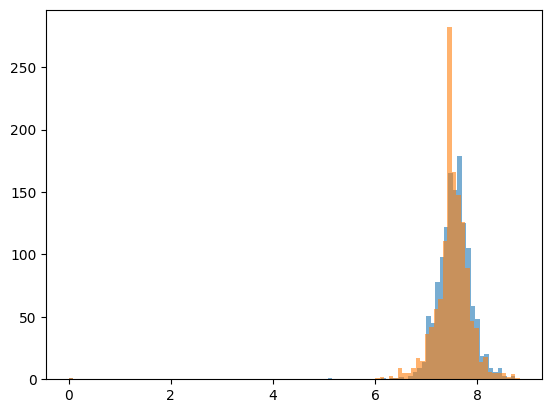

In [49]:
plt.hist(coffee_data_tidy["aroma"], bins = 100, label = "Aroma", alpha = 0.6)
plt.hist(coffee_data_tidy["flavor"], bins = 100, label = "Flavor", alpha = 0.6)
plt.show()

As we can see, the two of them resemble a normal distribution with values, that are closely related to each other. Lets look at their correlation:

In [50]:
coffee_data_tidy["aroma"].corr(coffee_data_tidy["flavor"])

np.float64(0.8121345889000052)

As we can see, the correlation is positive and very strong

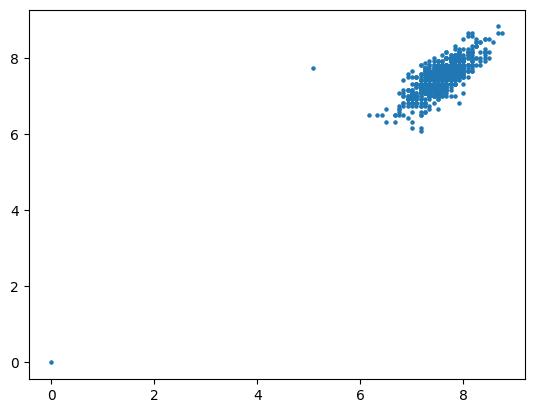

In [51]:
plt.scatter(coffee_data_tidy["aroma"], coffee_data_tidy["flavor"], s = 5)
plt.show()

Except for a few potential outliars we can see a clear correlation between the values.

Now lets look for a correlation between these values and the moisture:

In [52]:
coffee_data_tidy["aroma"].corr(coffee_data_tidy["moisture"])

np.float64(-0.13098390873601395)

In [53]:
coffee_data_tidy["flavor"].corr(coffee_data_tidy["moisture"])

np.float64(-0.1428882314526904)

As we can see, there is no correlation between the two columns and the moisture.

### Problem 10. High-level errors (1 point)
Check the countries against region names, altitudes, and companies. Are there any discrepancies (e.g. human errors, like a region not matching the country)? Take a look at the (cleaned) altitudes; there has been a lot of preprocessing done to them. Was it done correctly?

Lets check the altitutes:

In [54]:
coffee_data_tidy["altitude"].unique()

array(['1950-2200', '1600 - 1800 m', '1800-2200', nan, '1570-1700',
       '1795-1850', '1855-1955', 'meters above sea level: 1.872',
       'meters above sea level: 1.943', '2000 ft',
       'meters above sea level: 2.080', '1450', '1700-2000m',
       'meters above sea level: 2.019', '1300 msnm', '1320',
       'meters above sea level: 2.112', '1250m', '1950', '1400', '1200',
       '1300', '1750-1800', '1800', 'meters above sea level: 1.941',
       '1.2', '1000 m', '1754', '900-1500m', '1520m-2200m', '1400-1900m',
       '1500-2000 m', '1400ft', '1400-1900', '1800 msnm', '1600',
       '1800-2000', '5000', '4650', '1700 mts', '1500 meters',
       '1300~1400 m.s.l', '1680', '1900m', '5600-5760 metros', '1700',
       '1770', 'above 1600 m', 'above 1200 m', '1550 msnm', '1550',
       '1250-1400 meter', '1400 msm', '2.560 msnm', '2136 msnm', '1900',
       '-1', '1580', '1100m', '1400 masl', '3500-5200 feet',
       'de 1600 a 1950 msnm', '800 m', '1620m', '1200m', '350',
       '14

Oh my God...

### * Problem 11. Clean and explore at will
The dataset claimed to be clean, but we were able to discover a lot of things to fix and do better.

Play around with the data as much as you wish, and if you find variables to tidy up and clean - by all means, do that!